In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 50  # número de generaciones
etapas = 5        # número de etapas  

In [3]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [4]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 0]
 [1 1 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 1 0 0]]


In [5]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [6]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [7]:
def funcion(x):
    return np.sum(x**2)
#def funcion(x,y):
     #return np.sum(x**2) # esfera
    #return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) #rosenbrock
 #   return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 #himmenblau

#def funcion(x,y):
 #  term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
  # term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
   #return -(y + 47) * term1 - x * term2



In [8]:
def eva_funcion(ind, a, b, m, decimales):
    x = deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [9]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1]
Fenotipo: [-6.532 -0.166]
Evaluación f(x): 42.694579999999995

Individuo 2:
Genotipo: [1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0]
Fenotipo: [2.709 7.064]
Evaluación f(x): 57.238777

Individuo 3:
Genotipo: [1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1]
Fenotipo: [ 5.691 -0.44 ]
Evaluación f(x): 32.581081

Individuo 4:
Genotipo: [1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0]
Fenotipo: [ 3.887 -5.447]
Evaluación f(x): 44.778578

Individuo 5:
Genotipo: [1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0]
Fenotipo: [ 6.736 -1.205]
Evaluación f(x): 46.825720999999994

Individuo 6:
Genotipo: [0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0]
Fenotipo: [-4.82   4.545]
Evaluación f(x): 43.889425

Individuo 7:
Genotipo: [0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0]
Fenotipo: [-4.269 -0.407]
Evaluación f(x): 18.39001

Individuo 8

In [10]:
def ruleta(pob, m, a, b, decimales, epsilon):
    aptitudes = []
    for ind in pob:
        f_val = eva_funcion(ind, m, a, b, decimales)
        aptitud = 1/(f_val + epsilon)  # función de evaluación de aptitud
        aptitudes.append(aptitud)
    aptitudes = np.array(aptitudes)
    
    total_aptitud = np.sum(aptitudes) # suma acumulada de aptitudes
    probas = aptitudes / total_aptitud
    
    
    acc_n = np.cumsum(probas) # acumulado de las sumas
    
    
    t = np.random.rand() # número aleatorio
    ind_seleccionado = np.where(acc_n >= t)[0][0]
    return pob[ind_seleccionado], ind_seleccionado

In [11]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [12]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [13]:
def AG_etapas_ruleta(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.1 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            #if round(mejor_ahora, decimales) <= target:
            #    print("Se ha alcanzado el objetivo")
            #   return mejor_hijo, mejor_ahora, total_generacion, h, h_pp 
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = ruleta(pob, m, a, b, decimales, epsilon)
                padre2, _ = ruleta(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: 0.01 | Promedio: 4.381
Generación 20 - Mejor: 0.0 | Promedio: 12.738
Generación 30 - Mejor: 0.0 | Promedio: 4.669
Generación 40 - Mejor: 0.0 | Promedio: 3.671
Generación 50 - Mejor: 0.0 | Promedio: 7.22
Fin de la Etapa 1: Mejor en etapa: 0.0 | Promedio etapa: 9.755

=== Etapa 2 ===
Generación 60 - Mejor: 0.0 | Promedio: 3.37
Generación 70 - Mejor: 0.0 | Promedio: 13.816
Generación 80 - Mejor: 0.0 | Promedio: 3.692
Generación 90 - Mejor: 0.0 | Promedio: 7.282
Generación 100 - Mejor: 0.0 | Promedio: 12.633
Fin de la Etapa 2: Mejor en etapa: 0.0 | Promedio etapa: 7.882

=== Etapa 3 ===
Generación 110 - Mejor: 0.0 | Promedio: 8.792
Generación 120 - Mejor: 0.0 | Promedio: 12.854
Generación 130 - Mejor: 0.0 | Promedio: 9.449
Generación 140 - Mejor: 0.0 | Promedio: 7.179
Generación 150 - Mejor: 0.0 | Promedio: 14.124
Fin de la Etapa 3: Mejor en etapa: 0.0 | Promedio etapa: 7.27

=== Etapa 4 ===
Generación 160 - Mejor: 0.0 | Promedio: 10.517


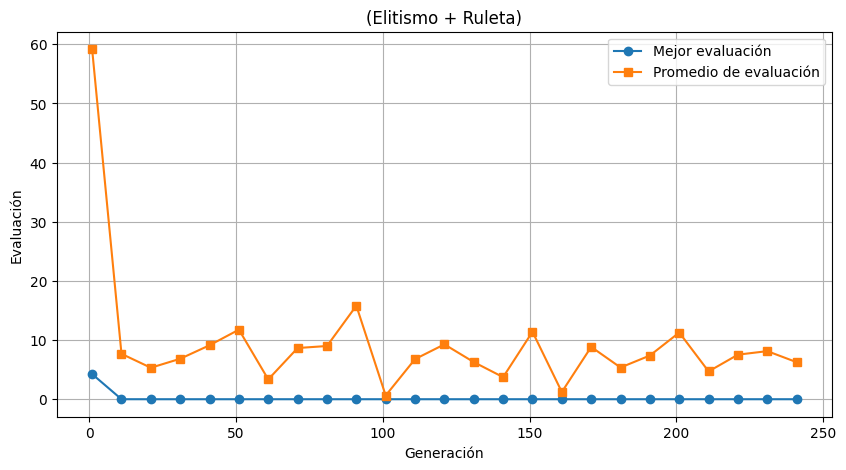

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: 0.0 | Promedio: 6.542
Generación 20 - Mejor: 0.0 | Promedio: 9.095
Generación 30 - Mejor: 0.0 | Promedio: 4.246
Generación 40 - Mejor: 0.0 | Promedio: 3.237
Generación 50 - Mejor: 0.0 | Promedio: 11.547
Fin de la Etapa 1: Mejor en etapa: 0.0 | Promedio etapa: 9.326

=== Etapa 2 ===
Generación 60 - Mejor: 0.0 | Promedio: 5.631
Generación 70 - Mejor: 0.0 | Promedio: 7.592
Generación 80 - Mejor: 0.0 | Promedio: 9.223
Generación 90 - Mejor: 0.0 | Promedio: 6.183
Generación 100 - Mejor: 0.0 | Promedio: 11.226
Fin de la Etapa 2: Mejor en etapa: 0.0 | Promedio etapa: 7.495

=== Etapa 3 ===
Generación 110 - Mejor: 0.0 | Promedio: 7.943
Generación 120 - Mejor: 0.0 | Promedio: 5.756
Generación 130 - Mejor: 0.0 | Promedio: 3.225
Generación 140 - Mejor: 0.0 | Promedio: 6.898
Generación 150 - Mejor: 0.0 | Promedio: 7.612
Fin de la Etapa 3: Mejor en etapa: 0.0 | Promedio etapa: 7.929

=== Etapa 4 ===
Generación 160 - Mejor: 0.0 | Promedio: 6.677
Ge

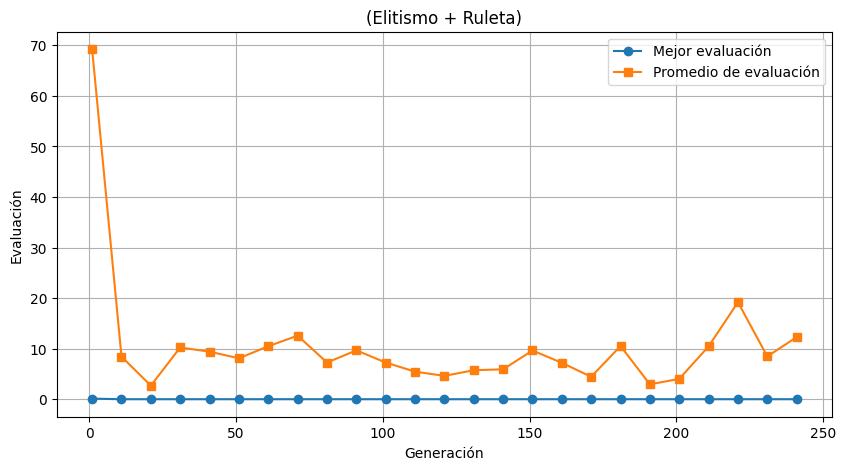

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: 0.001 | Promedio: 4.563
Generación 20 - Mejor: 0.0 | Promedio: 11.143
Generación 30 - Mejor: 0.0 | Promedio: 6.888
Generación 40 - Mejor: 0.0 | Promedio: 9.103
Generación 50 - Mejor: 0.0 | Promedio: 15.406
Fin de la Etapa 1: Mejor en etapa: 0.0 | Promedio etapa: 10.47

=== Etapa 2 ===
Generación 60 - Mejor: 0.0 | Promedio: 11.074
Generación 70 - Mejor: 0.0 | Promedio: 5.468
Generación 80 - Mejor: 0.0 | Promedio: 11.422
Generación 90 - Mejor: 0.0 | Promedio: 9.488
Generación 100 - Mejor: 0.0 | Promedio: 3.14
Fin de la Etapa 2: Mejor en etapa: 0.0 | Promedio etapa: 7.793

=== Etapa 3 ===
Generación 110 - Mejor: 0.0 | Promedio: 5.285
Generación 120 - Mejor: 0.0 | Promedio: 7.834
Generación 130 - Mejor: 0.0 | Promedio: 9.567
Generación 140 - Mejor: 0.0 | Promedio: 11.219
Generación 150 - Mejor: 0.0 | Promedio: 9.738
Fin de la Etapa 3: Mejor en etapa: 0.0 | Promedio etapa: 8.397

=== Etapa 4 ===
Generación 160 - Mejor: 0.0 | Promedio: 5.55

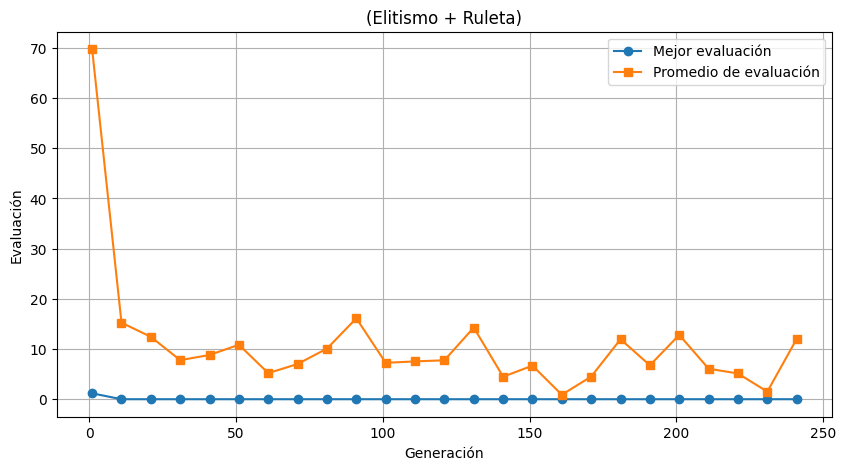

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: 0.0 | Promedio: 13.334
Generación 20 - Mejor: 0.0 | Promedio: 10.24
Generación 30 - Mejor: 0.0 | Promedio: 6.182
Generación 40 - Mejor: 0.0 | Promedio: 2.675
Generación 50 - Mejor: 0.0 | Promedio: 7.068
Fin de la Etapa 1: Mejor en etapa: 0.0 | Promedio etapa: 9.013

=== Etapa 2 ===
Generación 60 - Mejor: 0.0 | Promedio: 9.735
Generación 70 - Mejor: 0.0 | Promedio: 10.05
Generación 80 - Mejor: 0.0 | Promedio: 5.787
Generación 90 - Mejor: 0.0 | Promedio: 9.902
Generación 100 - Mejor: 0.0 | Promedio: 10.251
Fin de la Etapa 2: Mejor en etapa: 0.0 | Promedio etapa: 8.58

=== Etapa 3 ===
Generación 110 - Mejor: 0.0 | Promedio: 9.903
Generación 120 - Mejor: 0.0 | Promedio: 9.096
Generación 130 - Mejor: 0.0 | Promedio: 4.699
Generación 140 - Mejor: 0.0 | Promedio: 2.311
Generación 150 - Mejor: 0.0 | Promedio: 5.289
Fin de la Etapa 3: Mejor en etapa: 0.0 | Promedio etapa: 6.827

=== Etapa 4 ===
Generación 160 - Mejor: 0.0 | Promedio: 4.198
Gen

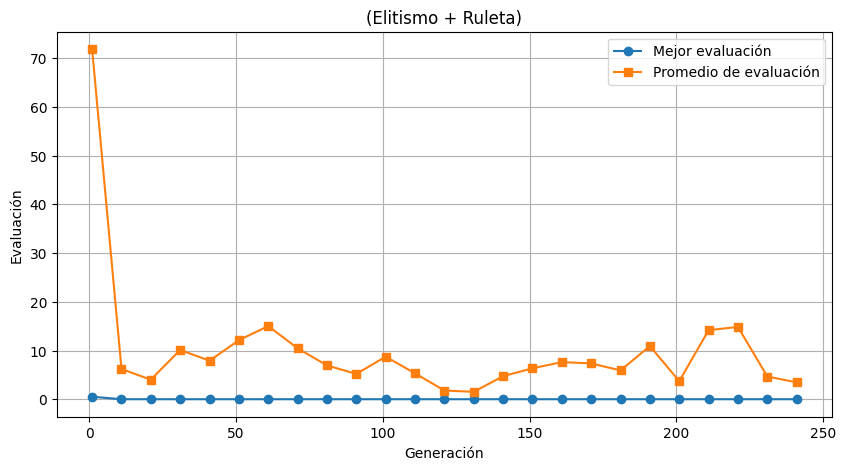

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: 0.0 | Promedio: 10.39
Generación 20 - Mejor: 0.0 | Promedio: 4.94
Generación 30 - Mejor: 0.0 | Promedio: 6.331
Generación 40 - Mejor: 0.0 | Promedio: 11.666
Generación 50 - Mejor: 0.0 | Promedio: 10.636
Fin de la Etapa 1: Mejor en etapa: 0.0 | Promedio etapa: 9.624

=== Etapa 2 ===
Generación 60 - Mejor: 0.0 | Promedio: 1.9
Generación 70 - Mejor: 0.0 | Promedio: 4.532
Generación 80 - Mejor: 0.0 | Promedio: 10.335
Generación 90 - Mejor: 0.0 | Promedio: 10.494
Generación 100 - Mejor: 0.0 | Promedio: 9.747
Fin de la Etapa 2: Mejor en etapa: 0.0 | Promedio etapa: 7.49

=== Etapa 3 ===
Generación 110 - Mejor: 0.0 | Promedio: 12.469
Generación 120 - Mejor: 0.0 | Promedio: 7.323
Generación 130 - Mejor: 0.0 | Promedio: 4.359
Generación 140 - Mejor: 0.0 | Promedio: 3.562
Generación 150 - Mejor: 0.0 | Promedio: 8.123
Fin de la Etapa 3: Mejor en etapa: 0.0 | Promedio etapa: 8.083

=== Etapa 4 ===
Generación 160 - Mejor: 0.0 | Promedio: 7.021
Gen

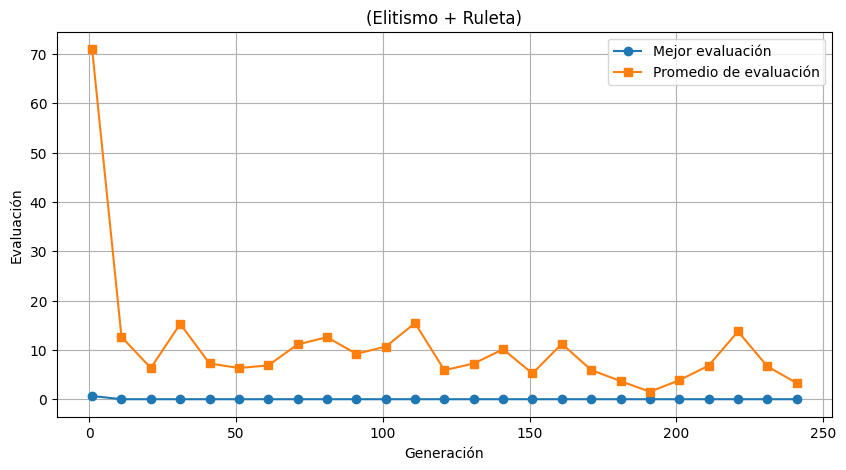

In [14]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_ruleta(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Elitismo + Ruleta)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            